In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import helpers.processing_helpers as ph

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [2]:
df_dev = pd.read_csv("./dataset/development.csv")

In [3]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))
sensors_removed = sensors_removed.drop(columns=ph.get_column_names(['tmax', 'rms'], acc_idxs))

In [13]:
df_zero, y = ph.insert_zeros(sensors_removed, acc_idxs, 20)

In [14]:
negpmax_clms = df_zero[[f'negpmax[{i}]' for i in acc_idxs]]
df_above_zero = negpmax_clms[(negpmax_clms > 0).any(axis=1)]
df_zero = df_zero.drop(df_above_zero.index.values)

In [29]:
joined_negpmax = pd.concat([df_zero[clmn] for clmn in negpmax_clms])
df_zero = df_zero.drop(joined_negpmax[joined_negpmax < -100].index)

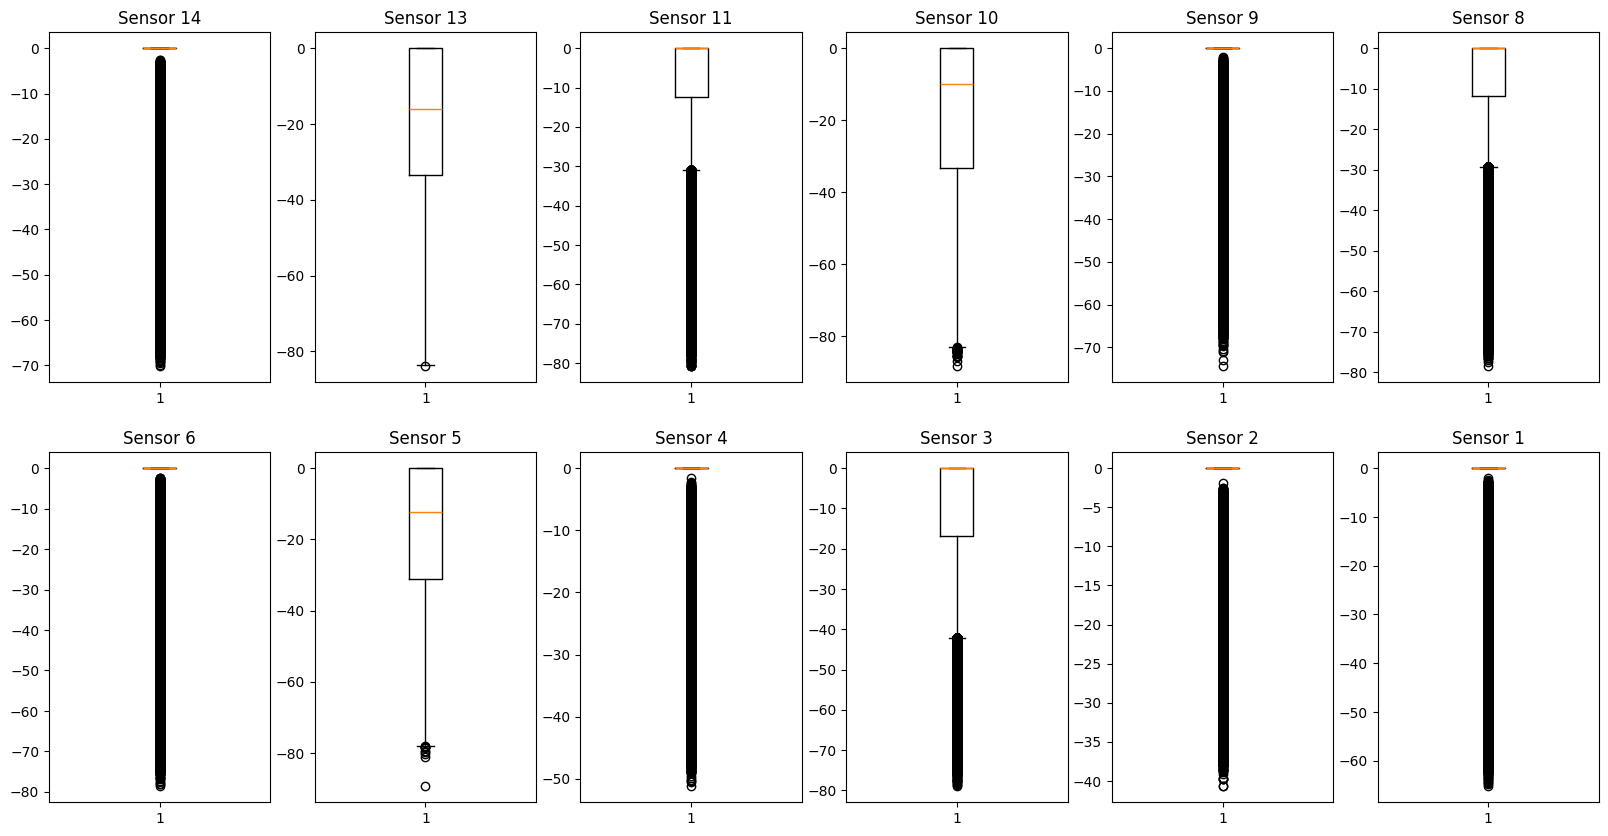

In [30]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(df_zero[f'negpmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

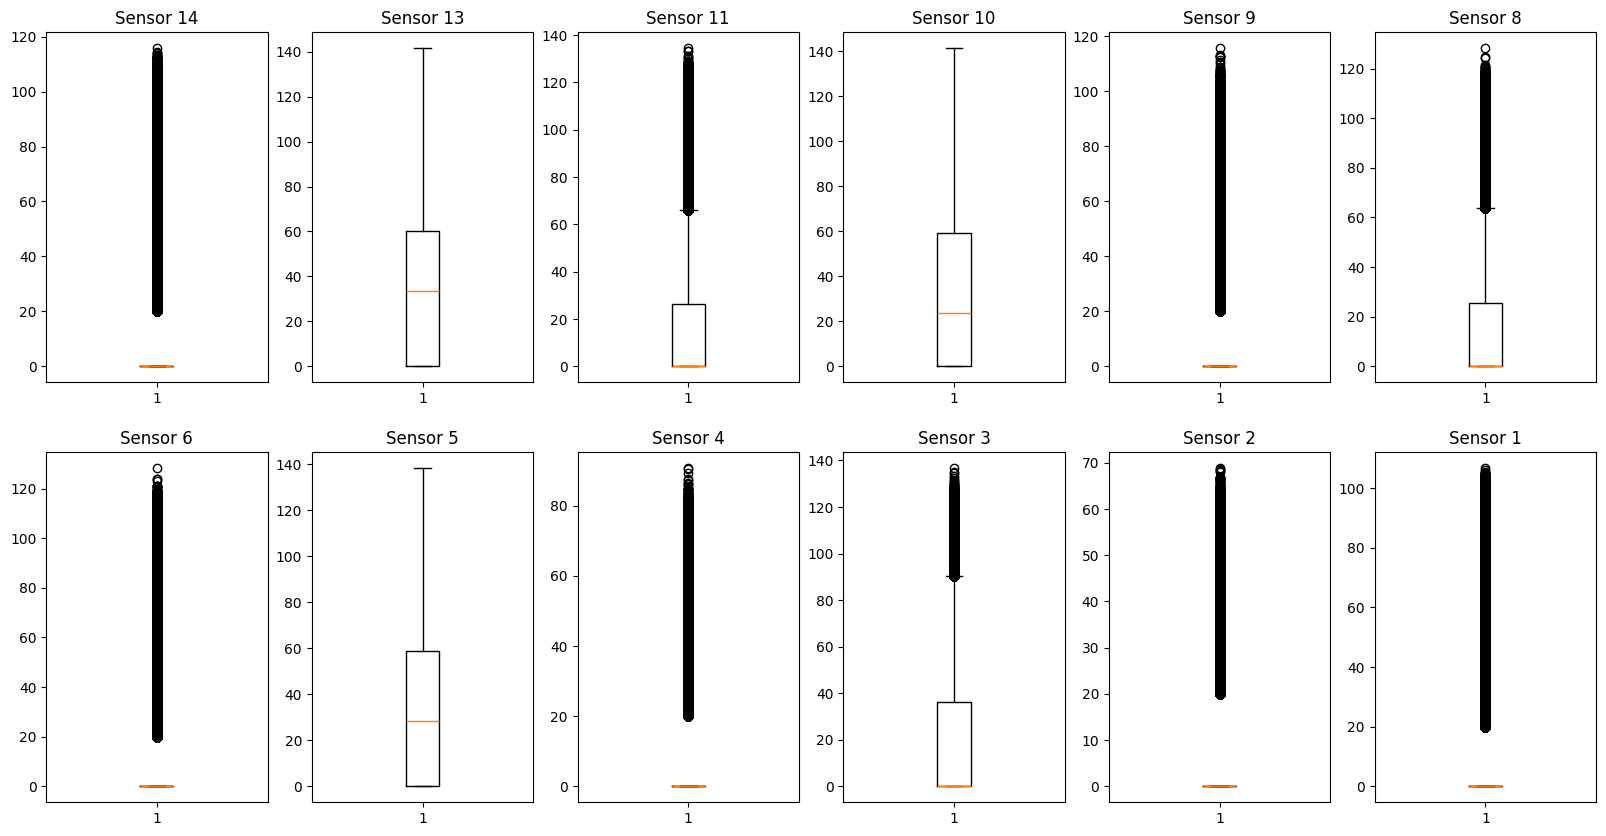

In [31]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(df_zero[f'pmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

Text(0.5, 0, 'pmax')

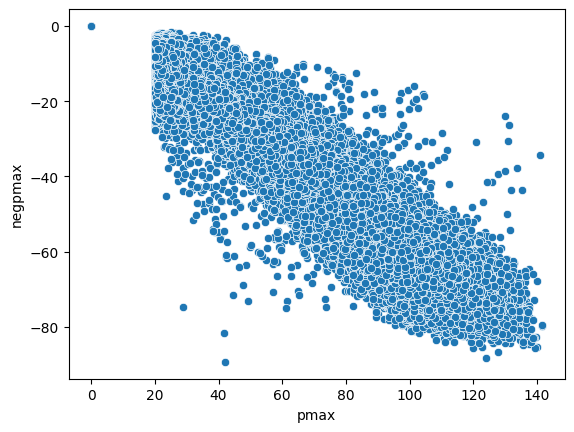

In [32]:
pmax_clms = df_zero[[f'pmax[{i}]' for i in acc_idxs]]
joined_pmax = pd.concat([df_zero[clmn] for clmn in pmax_clms])
new_joined_negpmax = pd.concat([df_zero[clmn] for clmn in negpmax_clms])

scatter = sb.scatterplot(x=joined_pmax, y=new_joined_negpmax)
scatter.set_ylabel('negpmax')
scatter.set_xlabel('pmax')